# WaveNet Autoencoder

Wavenet autoencoder merupakan sebuah model generative yang dibentuk untuk proses sintesa dari musik. Proses yang terdapat pada Jupyter Notebook ini bersumber dari https://github.com/tensorflow/magenta-demos/blob/master/jupyter-notebooks/NSynth.ipynb.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from magenta.models.nsynth import utils
from magenta.models.nsynth.wavenet import fastgen
from IPython.display import Audio
%matplotlib inline
%config InlineBackend.figure_format = 'jpg'

Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.


In [2]:
fname = "i054.wav"
fdir = "/home/aini/Documents/AML/Data/"
sr = 16000
audio = utils.load_audio(fdir+fname, sample_length=80000, sr=sr)
sample_length = audio.shape[0]
print ('{} samples, {} seconds'.format(sample_length, sample_length/float(sr)))

80000 samples, 5.0 seconds


### Encoding Process

model yang digunakan merupakan pre-trained model NSynth dataset dari http://download.magenta.tensorflow.org/models/nsynth/wavenet-ckpt.tar

In [ ]:
%time encoding = fastgen.encode(audio, 'model.ckpt-200000')

In [4]:
print encoding.shape

(1, 125, 16)


In [5]:
np.save(fname+'.npy', encoding)

Text(0.5,1,u'Nsynth Encoding')

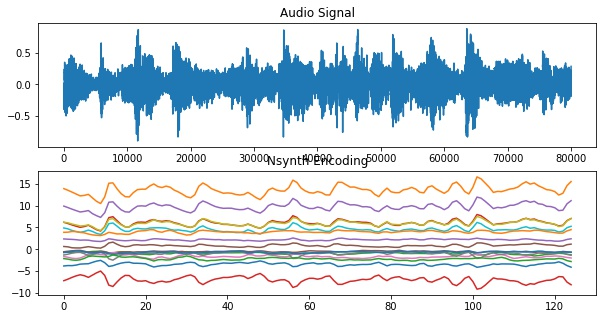

In [6]:
fig, axs = plt.subplots(2, 1, figsize=(10,5))
axs[0].plot(audio);
axs[0].set_title('Audio Signal')
axs[1].plot(encoding[0]);
axs[1].set_title('Nsynth Encoding')

## Decoding Process

In [8]:
%time fastgen.synthesize(encoding, save_paths=['gen_' + fname], samples_per_save=5000)

INFO:tensorflow:Restoring parameters from model.ckpt-200000
INFO:tensorflow:Sample: 0
INFO:tensorflow:Saving: gen_i054.wav
INFO:tensorflow:Sample: 100
INFO:tensorflow:Sample: 200
INFO:tensorflow:Sample: 300
INFO:tensorflow:Sample: 400
INFO:tensorflow:Sample: 500
INFO:tensorflow:Sample: 600
INFO:tensorflow:Sample: 700
INFO:tensorflow:Sample: 800
INFO:tensorflow:Sample: 900
INFO:tensorflow:Sample: 1000
INFO:tensorflow:Sample: 1100
INFO:tensorflow:Sample: 1200
INFO:tensorflow:Sample: 1300
INFO:tensorflow:Sample: 1400
INFO:tensorflow:Sample: 1500
INFO:tensorflow:Sample: 1600
INFO:tensorflow:Sample: 1700
INFO:tensorflow:Sample: 1800
INFO:tensorflow:Sample: 1900
INFO:tensorflow:Sample: 2000
INFO:tensorflow:Sample: 2100
INFO:tensorflow:Sample: 2200
INFO:tensorflow:Sample: 2300
INFO:tensorflow:Sample: 2400
INFO:tensorflow:Sample: 2500
INFO:tensorflow:Sample: 2600
INFO:tensorflow:Sample: 2700
INFO:tensorflow:Sample: 2800
INFO:tensorflow:Sample: 2900
INFO:tensorflow:Sample: 3000
INFO:tensorflow:

INFO:tensorflow:Sample: 26800
INFO:tensorflow:Sample: 26900
INFO:tensorflow:Sample: 27000
INFO:tensorflow:Sample: 27100
INFO:tensorflow:Sample: 27200
INFO:tensorflow:Sample: 27300
INFO:tensorflow:Sample: 27400
INFO:tensorflow:Sample: 27500
INFO:tensorflow:Sample: 27600
INFO:tensorflow:Sample: 27700
INFO:tensorflow:Sample: 27800
INFO:tensorflow:Sample: 27900
INFO:tensorflow:Sample: 28000
INFO:tensorflow:Sample: 28100
INFO:tensorflow:Sample: 28200
INFO:tensorflow:Sample: 28300
INFO:tensorflow:Sample: 28400
INFO:tensorflow:Sample: 28500
INFO:tensorflow:Sample: 28600
INFO:tensorflow:Sample: 28700
INFO:tensorflow:Sample: 28800
INFO:tensorflow:Sample: 28900
INFO:tensorflow:Sample: 29000
INFO:tensorflow:Sample: 29100
INFO:tensorflow:Sample: 29200
INFO:tensorflow:Sample: 29300
INFO:tensorflow:Sample: 29400
INFO:tensorflow:Sample: 29500
INFO:tensorflow:Sample: 29600
INFO:tensorflow:Sample: 29700
INFO:tensorflow:Sample: 29800
INFO:tensorflow:Sample: 29900
INFO:tensorflow:Sample: 30000
INFO:tenso

INFO:tensorflow:Sample: 53500
INFO:tensorflow:Sample: 53600
INFO:tensorflow:Sample: 53700
INFO:tensorflow:Sample: 53800
INFO:tensorflow:Sample: 53900
INFO:tensorflow:Sample: 54000
INFO:tensorflow:Sample: 54100
INFO:tensorflow:Sample: 54200
INFO:tensorflow:Sample: 54300
INFO:tensorflow:Sample: 54400
INFO:tensorflow:Sample: 54500
INFO:tensorflow:Sample: 54600
INFO:tensorflow:Sample: 54700
INFO:tensorflow:Sample: 54800
INFO:tensorflow:Sample: 54900
INFO:tensorflow:Sample: 55000
INFO:tensorflow:Saving: gen_i054.wav
INFO:tensorflow:Sample: 55100
INFO:tensorflow:Sample: 55200
INFO:tensorflow:Sample: 55300
INFO:tensorflow:Sample: 55400
INFO:tensorflow:Sample: 55500
INFO:tensorflow:Sample: 55600
INFO:tensorflow:Sample: 55700
INFO:tensorflow:Sample: 55800
INFO:tensorflow:Sample: 55900
INFO:tensorflow:Sample: 56000
INFO:tensorflow:Sample: 56100
INFO:tensorflow:Sample: 56200
INFO:tensorflow:Sample: 56300
INFO:tensorflow:Sample: 56400
INFO:tensorflow:Sample: 56500
INFO:tensorflow:Sample: 56600
INF

## Interpolation

Interpolasi dari 2 audio

In [10]:
def load_encoding(fname, sample_length=None, sr=16000, ckpt='model.ckpt-200000'):
    audio = utils.load_audio(fname, sample_length=sample_length, sr=sr)
    encoding = fastgen.encode(audio, ckpt, sample_length)
    return audio, encoding

In [21]:
sample_length = 80000

# from https://www.freesound.org/people/MustardPlug/sounds/395058/
aud1, enc1 = load_encoding(fdir+'drum.wav', sample_length)

# from https://www.freesound.org/people/xserra/sounds/176098/
aud2, enc2 = load_encoding(fdir+'i003.wav', sample_length)

INFO:tensorflow:Restoring parameters from model.ckpt-200000
INFO:tensorflow:Restoring parameters from model.ckpt-200000


In [22]:
enc_mix = (enc1 + enc2) / 2.0

Text(0.5,1,u'Average')

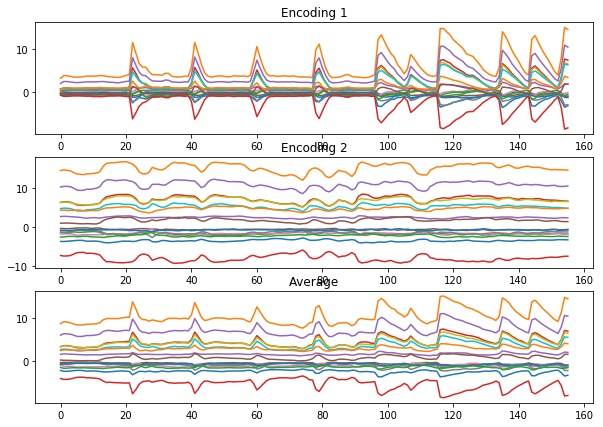

In [23]:
fig, axs = plt.subplots(3, 1, figsize=(10, 7))
axs[0].plot(enc1[0]); 
axs[0].set_title('Encoding 1')
axs[1].plot(enc2[0]);
axs[1].set_title('Encoding 2')
axs[2].plot(enc_mix[0]);
axs[2].set_title('Average')

## Fade Out & Fade In

In [24]:
def fade(encoding, mode='in'):
    length = encoding.shape[1]
    fadein = (0.5 * (1.0 - np.cos(3.1415 * np.arange(length) / 
                                  float(length)))).reshape(1, -1, 1)
    if mode == 'in':
        return fadein * encoding
    else:
        return (1.0 - fadein) * encoding

Text(0.5,1,u'Fade Out')

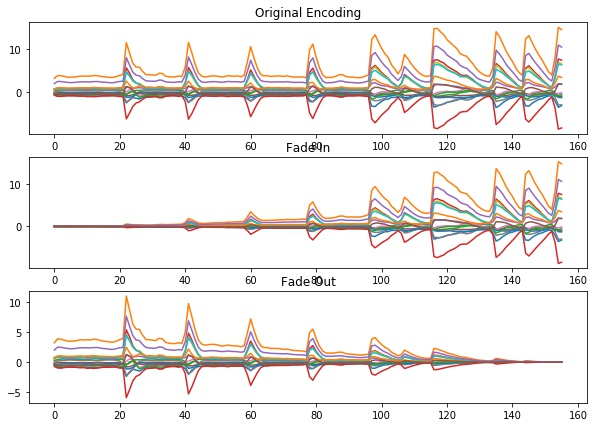

In [25]:
fig, axs = plt.subplots(3, 1, figsize=(10, 7))
axs[0].plot(enc1[0]); 
axs[0].set_title('Original Encoding')
axs[1].plot(fade(enc1, 'in')[0]);
axs[1].set_title('Fade In')
axs[2].plot(fade(enc1, 'out')[0]);
axs[2].set_title('Fade Out')

## Cross Fade

In [26]:
def crossfade(encoding1, encoding2):
    return fade(encoding1, 'out') + fade(encoding2, 'in')

Text(0.5,1,u'Crossfade')

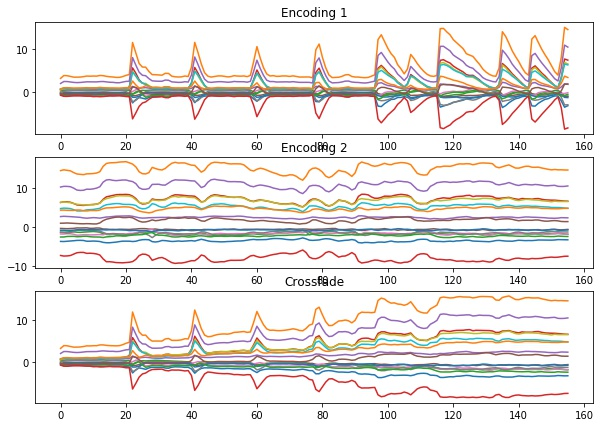

In [30]:
fig, axs = plt.subplots(3, 1, figsize=(10, 7))
axs[0].plot(enc1[0]); 
axs[0].set_title('Encoding 1')
axs[1].plot(enc2[0]);
axs[1].set_title('Encoding 2')
axs[2].plot(crossfade(enc1, enc2)[0]);
axs[2].set_title('Crossfade')

Text(0.5,1,u'0.1 * Encoding 1')

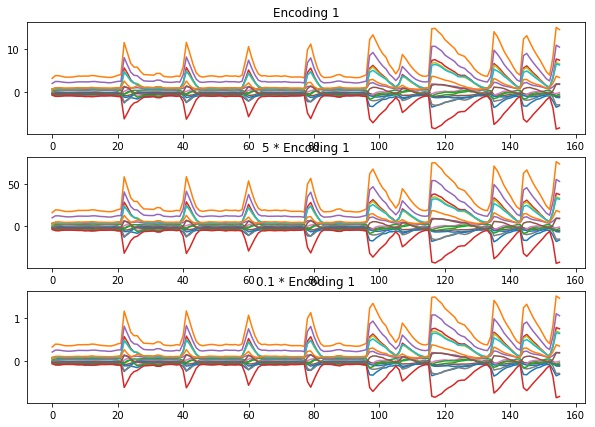

In [36]:
fig, axs = plt.subplots(3, 1, figsize=(10, 7))
axs[0].plot(enc1[0]); 
axs[0].set_title('Encoding 1')
axs[1].plot(5*enc1[0]);
axs[1].set_title('5 * Encoding 1')
axs[2].plot(0.1 * enc1[0]);
axs[2].set_title('0.1 * Encoding 1')